# I. Import thư viện

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import islice
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.class_weight import compute_sample_weight
import pickle
from joblib import dump, load

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

# II. Đọc dữ liệu

In [3]:
#df = pd.read_csv('/content/drive/MyDrive/DS317/df.csv')
df = pd.read_csv('D:\Learning\Semester 1 year 4\DS317\Project\Data\Raw_Data_IncludeCTN_For_Models.csv')

# III. Xây dựng mô hình




In [4]:
X = df.drop(columns={'xeploai'})
y = df['xeploai']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
labels = ['Rớt', 'Trung bình', 'Trung bình khá', 'Khá', 'Giỏi', 'Xuất sắc']

In [7]:
def visualization(y_test, y_pred):
  print('Weighted f1_score: ',f1_score(y_test, y_pred, average='weighted'))
  print('Macro f1_score: ',f1_score(y_test, y_pred, average='macro'))
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

In [8]:
def make_results_df(orginal, res_list):
    df_res = pd.DataFrame({
        'Accuracy': [accuracy_score(orginal, u) for u in res_list],
        'Precision': [precision_score(orginal, u, average='macro') for u in res_list],
        'Recall': [recall_score(orginal, u, average='macro') for u in res_list],
        'F1-macro': [f1_score(orginal, u, average='macro') for u in res_list]
    }, index=['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost'])
    return df_res

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6260 entries, 5223 to 7270
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mssv            6260 non-null   int64  
 1   soquyetdinh     6260 non-null   int64  
 2   ngaycapvb       6260 non-null   int64  
 3   namsinh         6260 non-null   float64
 4   gioitinh        6260 non-null   float64
 5   noisinh         6260 non-null   int64  
 6   lopsh           6260 non-null   int64  
 7   khoa            6260 non-null   int64  
 8   hedt            6260 non-null   int64  
 9   khoahoc         6260 non-null   float64
 10  chuyennganh2    6260 non-null   int64  
 11  tinhtrang       6260 non-null   float64
 12  diachi_tinhtp   6260 non-null   int64  
 13  diemnamhoc1     6260 non-null   float64
 14  diemnamhoc2     6260 non-null   float64
 15  diemnamhoc3     6260 non-null   float64
 16  diem_3_5        6260 non-null   float64
 17  drlnam1         6260 non-null 

## 1. Xét 3.5 năm học

### a) Decision Tree

In [10]:
model_dt = DecisionTreeClassifier(random_state=42)

In [11]:
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

Weighted f1_score:  0.9176941753777245
Macro f1_score:  0.686356449759864
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1165
           1       0.70      0.78      0.74        18
           2       0.64      0.64      0.64        50
           3       0.79      0.83      0.81       227
           4       0.74      0.68      0.71       102
           5       0.25      0.25      0.25         4

    accuracy                           0.92      1566
   macro avg       0.68      0.69      0.69      1566
weighted avg       0.92      0.92      0.92      1566



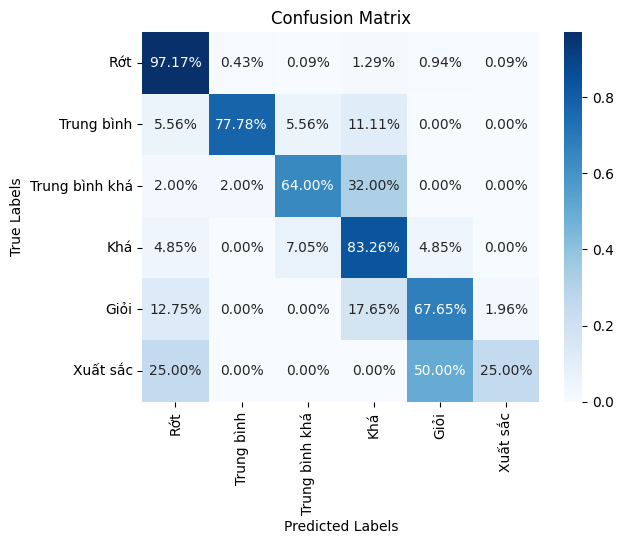

In [12]:
visualization(y_test, y_pred_dt)

### b) Random Forest

In [13]:
model_rf = RandomForestClassifier(random_state=42)

In [14]:
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

Weighted f1_score:  0.9387860931351827
Macro f1_score:  0.6859262371902822
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1165
           1       0.79      0.83      0.81        18
           2       0.76      0.58      0.66        50
           3       0.82      0.92      0.86       227
           4       0.78      0.81      0.80       102
           5       0.00      0.00      0.00         4

    accuracy                           0.94      1566
   macro avg       0.69      0.69      0.69      1566
weighted avg       0.94      0.94      0.94      1566



c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

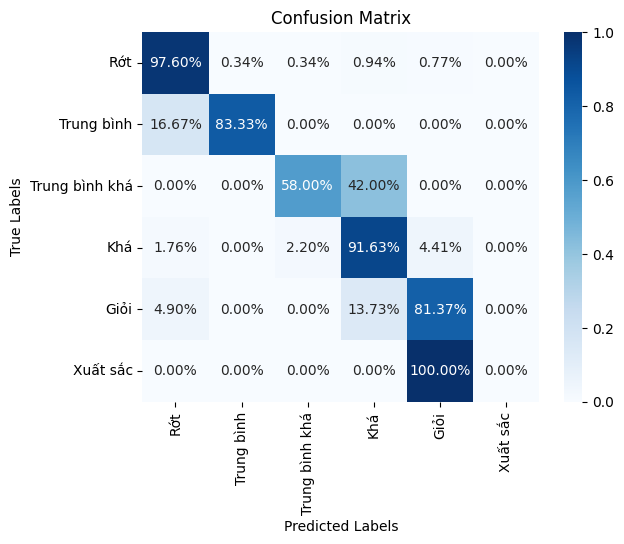

In [15]:
visualization(y_test, y_pred_rf)

### c) XGBoost

In [16]:
model_xg = XGBClassifier(random_state=42)

In [17]:
model_xg.fit(X_train, y_train)
y_pred_xg = model_xg.predict(X_test)

Weighted f1_score:  0.9442601893532923
Macro f1_score:  0.7210922625006221
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1165
           1       0.90      1.00      0.95        18
           2       0.77      0.66      0.71        50
           3       0.83      0.89      0.86       227
           4       0.83      0.83      0.83       102
           5       0.00      0.00      0.00         4

    accuracy                           0.95      1566
   macro avg       0.72      0.73      0.72      1566
weighted avg       0.94      0.95      0.94      1566



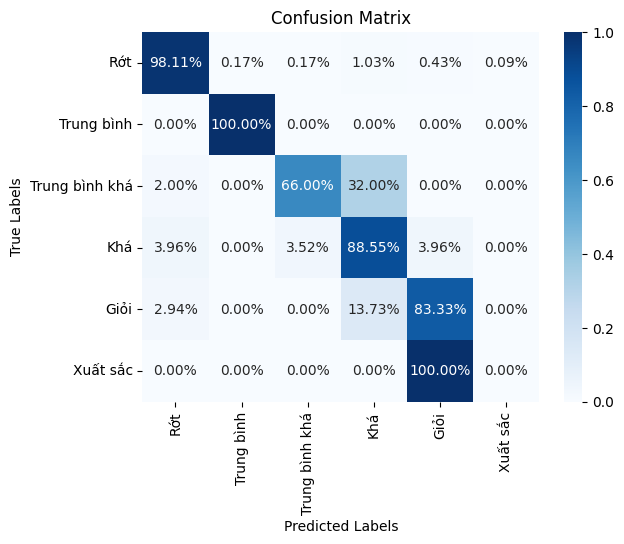

In [18]:
visualization(y_test, y_pred_xg)

### d) LightGBM

In [19]:
model_lgb = lgb.LGBMClassifier(objective='multiclass', num_class=6, random_state=42)

In [20]:
model_lgb.fit(X_train, y_train)
y_pred_lg = model_lgb.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001897 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2873
[LightGBM] [Info] Number of data points in the train set: 6260, number of used features: 28
[LightGBM] [Info] Start training from score -0.276878
[LightGBM] [Info] Start training from score -4.209336
[LightGBM] [Info] Start training from score -3.673031
[LightGBM] [Info] Start training from score -1.945112
[LightGBM] [Info] Start training from score -2.861402
[LightGBM] [Info] Start training from score -6.544711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

Weighted f1_score:  0.8679440309641682
Macro f1_score:  0.509496198689085
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1165
           1       0.13      0.44      0.20        18
           2       0.35      0.44      0.39        50
           3       0.76      0.68      0.72       227
           4       0.69      0.69      0.69       102
           5       0.07      0.25      0.11         4

    accuracy                           0.85      1566
   macro avg       0.49      0.57      0.51      1566
weighted avg       0.89      0.85      0.87      1566



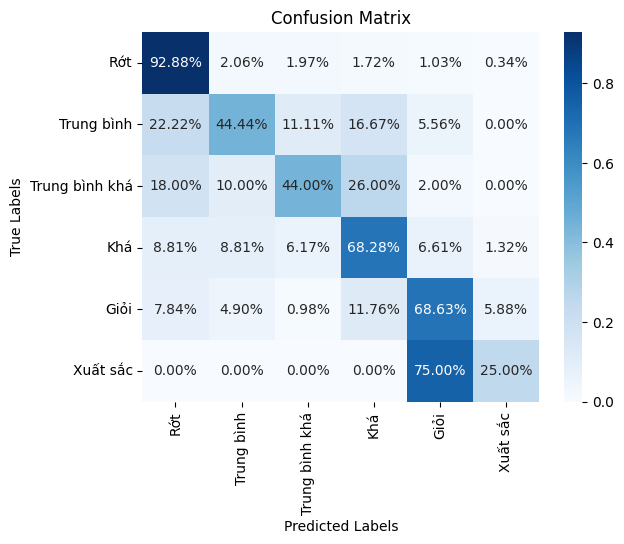

In [21]:
visualization(y_test, y_pred_lg)

### e) CatBoost

In [22]:
model_cb = CatBoostClassifier(random_state=42)

In [23]:
model_cb.fit(X_train, y_train)
y_pred_cb = model_cb.predict(X_test)

Learning rate set to 0.086886
0:	learn: 1.4817129	total: 151ms	remaining: 2m 31s
1:	learn: 1.2797933	total: 160ms	remaining: 1m 19s
2:	learn: 1.1297281	total: 167ms	remaining: 55.5s
3:	learn: 1.0112324	total: 175ms	remaining: 43.7s
4:	learn: 0.9130012	total: 183ms	remaining: 36.4s
5:	learn: 0.8304641	total: 192ms	remaining: 31.8s
6:	learn: 0.7565313	total: 199ms	remaining: 28.3s
7:	learn: 0.7005125	total: 207ms	remaining: 25.6s
8:	learn: 0.6475724	total: 213ms	remaining: 23.4s
9:	learn: 0.6025973	total: 219ms	remaining: 21.7s
10:	learn: 0.5613790	total: 226ms	remaining: 20.3s
11:	learn: 0.5257337	total: 232ms	remaining: 19.1s
12:	learn: 0.4942908	total: 238ms	remaining: 18.1s
13:	learn: 0.4649414	total: 244ms	remaining: 17.2s
14:	learn: 0.4383318	total: 251ms	remaining: 16.5s
15:	learn: 0.4157731	total: 257ms	remaining: 15.8s
16:	learn: 0.3926363	total: 264ms	remaining: 15.3s
17:	learn: 0.3730359	total: 271ms	remaining: 14.8s
18:	learn: 0.3569004	total: 278ms	remaining: 14.4s
19:	learn

Weighted f1_score:  0.9400549081404134
Macro f1_score:  0.7543949577105177
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1165
           1       0.94      0.83      0.88        18
           2       0.72      0.58      0.64        50
           3       0.82      0.90      0.86       227
           4       0.82      0.83      0.83       102
           5       0.50      0.25      0.33         4

    accuracy                           0.94      1566
   macro avg       0.80      0.73      0.75      1566
weighted avg       0.94      0.94      0.94      1566



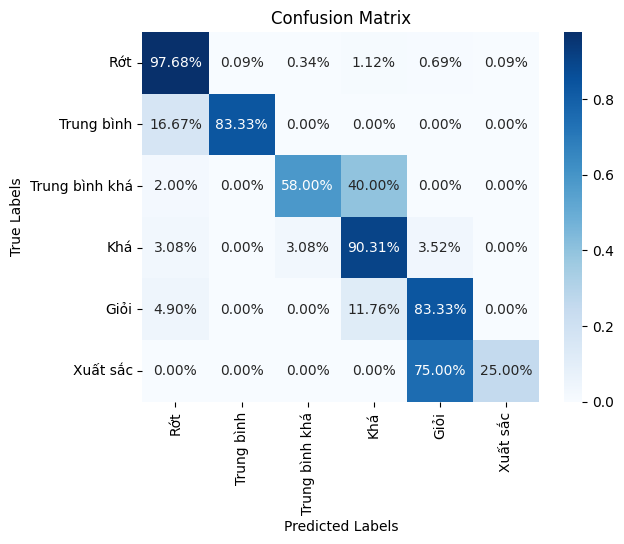

In [24]:
visualization(y_test, y_pred_cb)

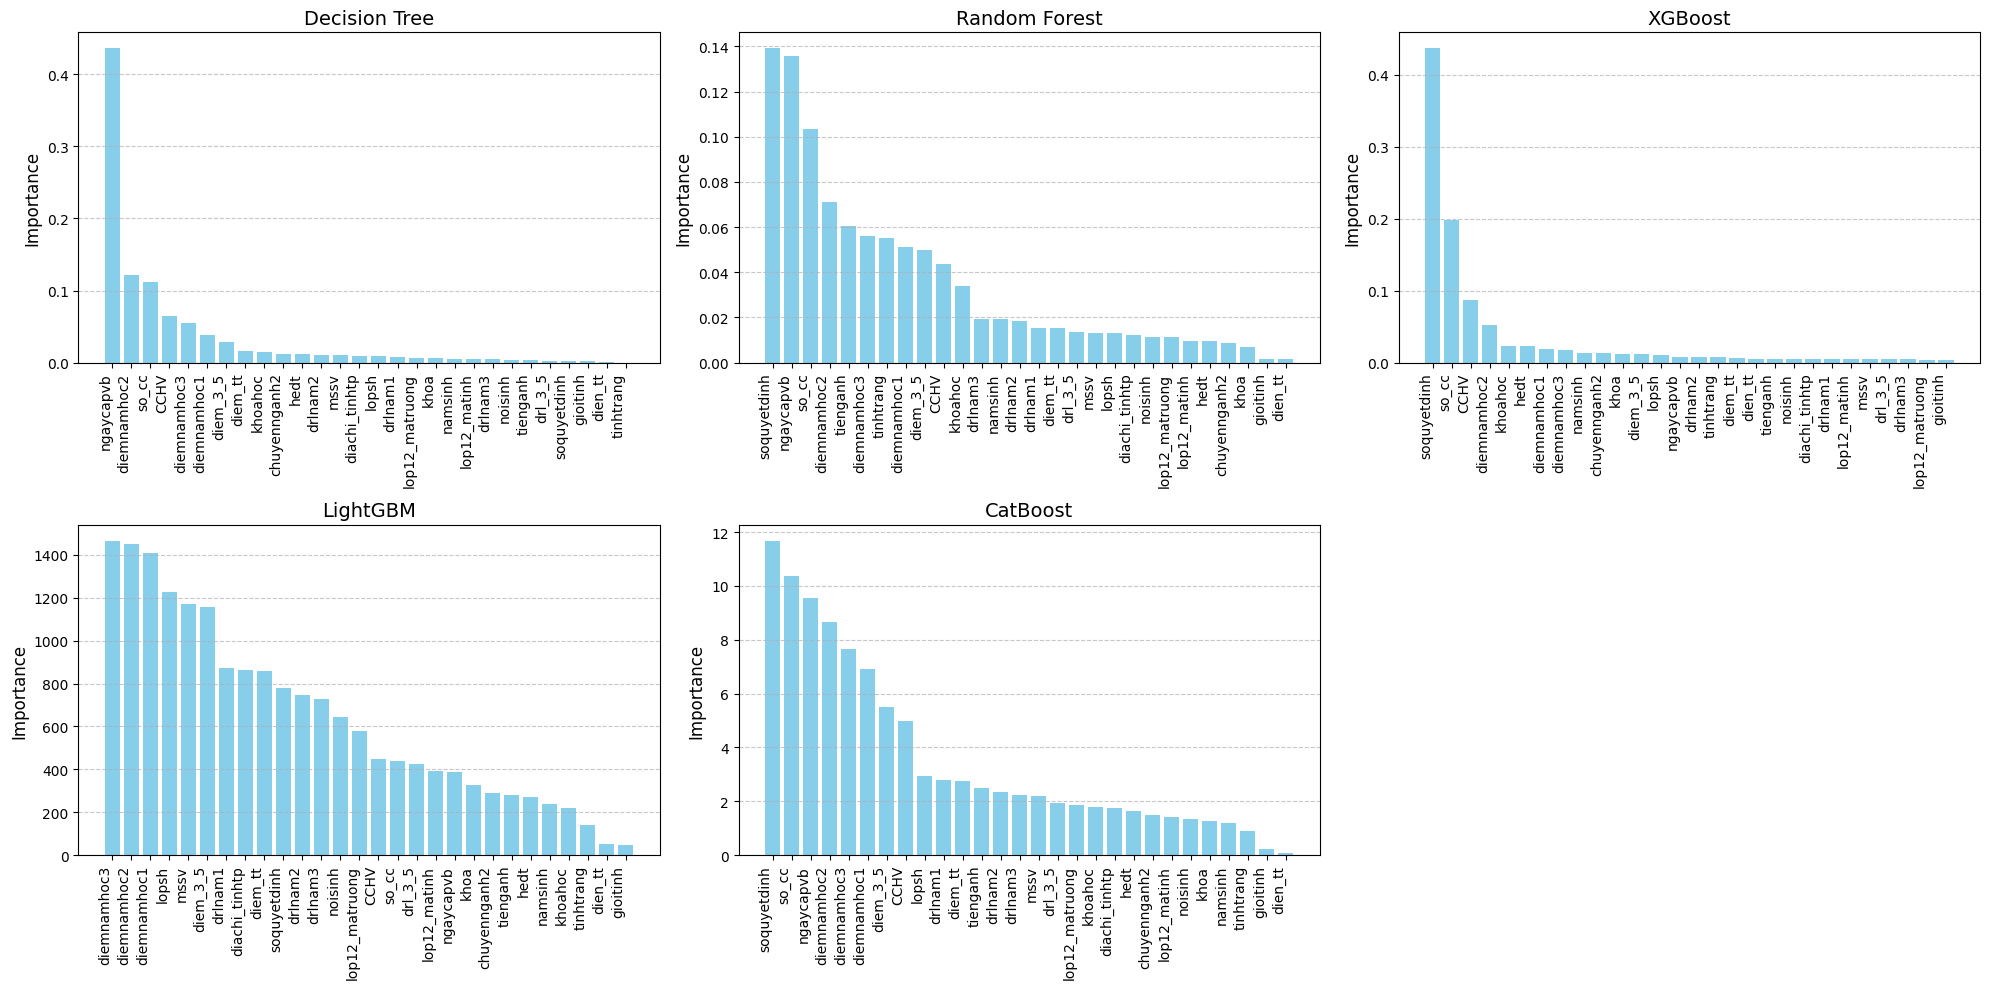

In [25]:
models = [model_dt, model_rf, model_xg, model_lgb, model_cb]  # Danh sách mô hình
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']  # Tên mô hình
feature_names = X_train.columns  # Tên đặc trưng

# Tạo figure và lưới 2x3
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 2 hàng, 3 cột
axes = axes.flatten()  # Duyệt qua các trục như một danh sách

# Vòng lặp qua từng mô hình
for i, model in enumerate(models):
    # Lấy giá trị feature importance từ model
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
    sorted_features = [feature_names[idx] for idx in indices]

    # Vẽ biểu đồ bar trên subplot tương ứng
    ax = axes[i]
    ax.bar(range(len(importances)), importances[indices], color='skyblue', align='center')
    ax.set_xticks(range(len(importances)))
    ax.set_xticklabels(sorted_features, rotation=90, ha='right', fontsize=10)
    ax.set_title(model_names[i], fontsize=14)
    ax.set_ylabel('Importance', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Xóa ô thừa (ô trống nếu có)
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

# Tự động căn chỉnh bố cục
plt.tight_layout()
plt.show()

# IV. Kết quả

In [26]:
df_res = make_results_df(y_test, [y_pred_dt, y_pred_rf, y_pred_xg, y_pred_lg, y_pred_cb])

c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
df_res

,Accuracy,Precision,Recall,F1-macro
Decision Tree,0.917625,0.682690,0.691420,0.686356
Random Forest,0.939974,0.690684,0.686554,0.685926
XGBoost,0.945083,0.718100,0.726652,0.721092
LightGBM,0.854406,0.494769,0.572049,0.509496
CatBoost,0.940613,0.797657,0.729429,0.754395
